# Coursera Capstone
# “Fashion Clothing Store”
## Choosing the best district in Zagreb, (Croatia)

For start let's load the needed libaries:

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim 
import requests 

from pandas.io.json import json_normalize 
import json

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import folium

from sklearn.cluster import KMeans

Lets load our dataset:
#### About the Dataset

+ district_name: Name of the district 
+ lat: District's latitude
+ lng: District longitude
+ size_km2: District size in square kilometers
+ pop: Number of population
+ pop_den: Population density
+ host: Number of hostels
+ hot: Number of hotels
+ priva: Number of private accomodation
+ unem_men: Number of unemployed men
+ unem_women: Number of unempleyed women
+ unem_tot: Totoal unemployment number
+ house_prices: House and venue buying prices. Euro per square meter.

In [2]:
df_zagreb = pd.read_csv('zagreb_demographics_set.csv')

In [3]:
df_zagreb.head(10)

,district_name,lat,lng,size_km2,pop,pop_den,host,hot,priva,unem_men,unem_wom,unem_tot,house_prices
0,Brezovica,45.715581,15.920606,127,1203,95,0,0,8,111,130,241,973
1,Črnomerec,45.832531,15.938308,24,38546,1606,2,1,128,512,514,1026,1569
2,Donja Dubrava,45.826214,16.051219,11,36363,3306,1,1,17,609,713,1322,1259
3,Donji Grad,45.808333,15.976111,3,37024,12341,15,14,752,517,547,1064,1901
4,Gornja Dubrava,45.841125,16.055661,40,61841,1546,2,0,29,904,1022,1926,1250
5,Gornji Grad–Medveščak,45.828247,15.979356,10,30962,3096,11,6,411,324,427,751,2062
6,Maksimir,45.832156,16.019858,14,48902,3493,3,3,147,604,701,1305,1740
7,Novi Zagreb – istok,45.773764,15.990944,17,59055,3474,0,2,49,821,876,1697,1253
8,Novi Zagreb – zapad,45.768653,15.952889,63,58103,922,2,7,90,799,1007,1806,1382
9,Peščenica – Žitnjak,45.793442,16.048461,35,56487,1614,1,2,61,993,1130,2123,1362


Lets load a map of Zagreb and point each district:

In [4]:
address = 'Zagreb'
geolocator = Nominatim(user_agent="fort_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates for Zagreb are {}, {}.'.format(latitude, longitude))

The geograpical coordinates for Zagreb are 45.813177, 15.977048.


In [5]:
map_zagreb = folium.Map(location=[latitude, longitude], zoom_start=11.2)
for lat, lng, district in zip(df_zagreb['lat'], df_zagreb['lng'], df_zagreb['district_name']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zagreb)  
map_zagreb

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/2.Zagreb_districts.png?raw=true" width = 1000> </a>

In [6]:
import seaborn as sns

#### Population number and density by the district:

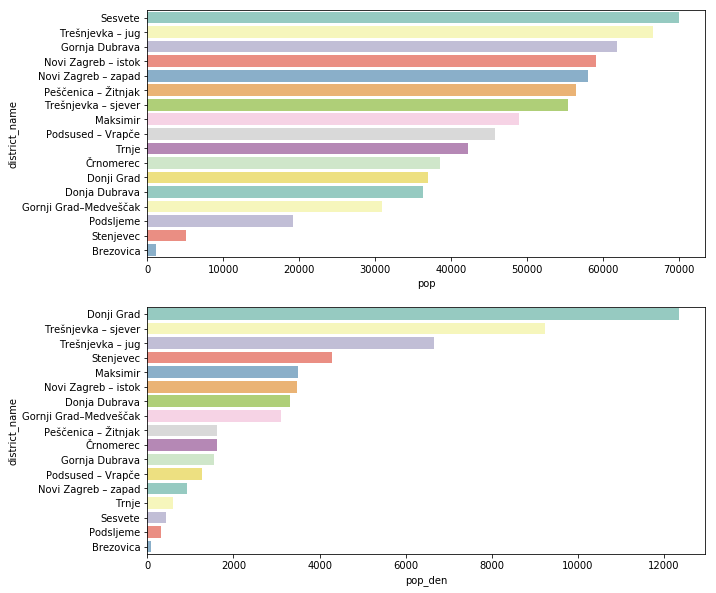

In [7]:
data = df_zagreb.sort_values(by = 'pop', ascending = False)
data1 = df_zagreb.sort_values(by = 'pop_den',ascending = False)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.barplot( y ="district_name", x ="pop", data=data, ax=ax1,palette='Set3')
g=sns.barplot(y ="district_name", x ="pop_den", data=data1, ax=ax2,palette='Set3')
plt.show()

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/3.Population.png?raw=true" width = 1000> </a>
<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/3.Population_density.png?raw=true" width = 1000> </a>

We can see that districts with most population density are:
 - Donji Grad, 
 - Trešnjevka - sjever, 
 - Trešnjevka - jug and 
 - Stenjevec.  
 
 Greater the population density, the more greater is potential of having foot traffic around our store.

#### Unemployment by the district:

Text(0.5, 0, 'Total unemployment by the district')

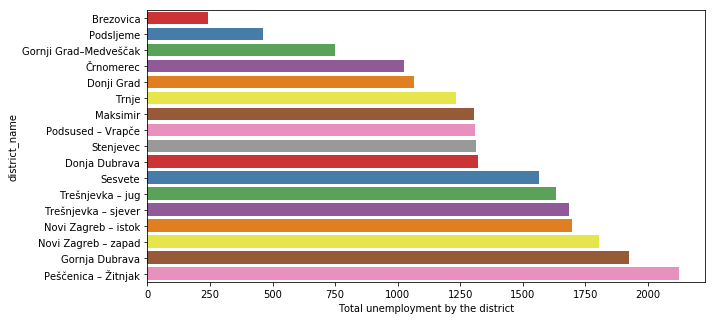

In [8]:
df = df_zagreb.sort_values(by = 'unem_tot')
fig = plt.figure(figsize=(10,5))
chart_un = sns.barplot(y = "district_name",x = "unem_tot", data = df, palette='Set1')
chart_un.set_xlabel("Total unemployment by the district")
#chart.set_xticklabels(rotation=45)

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/4.Unemployment_tot.png?raw=true" width = 1000> </a>

#### Unemployment by the gender:

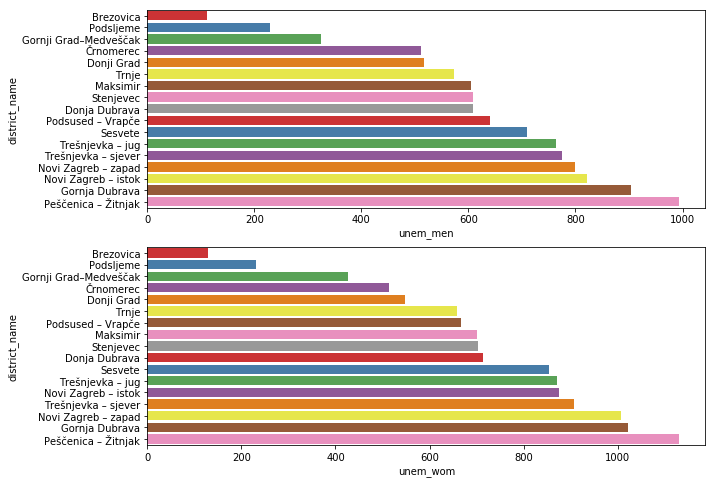

In [9]:
data3 = df_zagreb.sort_values(by = 'unem_men')
data4 = df_zagreb.sort_values(by = 'unem_wom')
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(y="district_name", x="unem_men", data=data3, ax=ax1,palette='Set1')
g=sns.barplot(y="district_name", x="unem_wom", data=data4, ax=ax2,palette='Set1')
plt.show()

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/5.Unemplymen_gender.png?raw=true" width = 1000> </a>

### Lets explore districts with Foursquare API:

In [10]:
CLIENT_ID = 'KOEKRAHZNXXK5WU4QDWWUQGMNYRXSYXUFB4TAZDOI1FS43D5' # your Foursquare ID
CLIENT_SECRET = '1HK3S3RPOVPXTITRJ20RYLWBZUCOZQIWGZGC23HV5GDJF0AB' # your Foursquare Secret
VERSION = '20190623' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KOEKRAHZNXXK5WU4QDWWUQGMNYRXSYXUFB4TAZDOI1FS43D5
CLIENT_SECRET:1HK3S3RPOVPXTITRJ20RYLWBZUCOZQIWGZGC23HV5GDJF0AB


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    LIMIT = 600
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
zagreb_venues = getNearbyVenues(names=df_zagreb['district_name'],
                                   latitudes=df_zagreb['lat'],
                                   longitudes=df_zagreb['lng']
                                  )

Brezovica
Črnomerec
Donja Dubrava
Donji Grad
Gornja Dubrava
Gornji Grad–Medveščak
Maksimir
Novi Zagreb – istok
Novi Zagreb – zapad
Peščenica – Žitnjak
Podsljeme
Podsused – Vrapče
Sesvete
Stenjevec
Trešnjevka – jug
Trešnjevka – sjever
Trnje


In [13]:
zagreb_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Črnomerec,45.832531,15.938308,Paulaner Grill Bar,45.824378,15.933938,BBQ Joint
1,Črnomerec,45.832531,15.938308,Apartament Trsje,45.831810,15.937771,Bed & Breakfast
2,Črnomerec,45.832531,15.938308,Čičkovina,45.834705,15.939392,Sake Bar
3,Črnomerec,45.832531,15.938308,Bistro Vrhovec,45.826866,15.947695,Bistro
4,Donja Dubrava,45.826214,16.051219,Residence Hotel,45.826571,16.046113,Hotel


Checking the size of the dataframe:

In [14]:
zagreb_venues.shape

(586, 7)

Number of unique venues per district:

In [15]:
counted = zagreb_venues.groupby('District').count()
counted.sort_values(by="Venue Category", ascending = False)

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Donji Grad,100,100,100,100,100,100
Trnje,70,70,70,70,70,70
Trešnjevka – jug,62,62,62,62,62,62
Stenjevec,54,54,54,54,54,54
Novi Zagreb – istok,53,53,53,53,53,53
Novi Zagreb – zapad,48,48,48,48,48,48
Trešnjevka – sjever,47,47,47,47,47,47
Donja Dubrava,36,36,36,36,36,36
Gornji Grad–Medveščak,35,35,35,35,35,35


We can see that "Donji grad", "Trnje", "Trešnjevka - jug" and "Stenjevec" are places with most unique venues. Let's save the dataframe to .csv file, for safety purpouse and if we need to load it later on.

In [16]:
counted.to_csv('zagreb_counted_venues.csv')

### DISTRICT ANALYSIS:

Lets group the venues based on their category:

In [17]:
zagreb_onehot = pd.get_dummies(zagreb_venues[['Venue Category']], prefix="", prefix_sep="")
zagreb_onehot['District'] = zagreb_venues['District'] 
fixed_columns = [zagreb_onehot.columns[-1]] + list(zagreb_onehot.columns[:-1])
zagreb = zagreb_onehot[fixed_columns]

In [18]:
zagreb_grouped = zagreb_onehot.groupby('District').mean().reset_index()
zagreb_grouped.head(3)

,District,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Café,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Dessert Shop,Dog Run,Drugstore,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Flea Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,General Entertainment,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,Hostel,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Nightclub,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,Rock Club,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Soccer Field,Sports Club,Stables,Steakhouse,Supermarket,Tennis Stadium,Theater,Trail,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Donja Dubrava,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.083333,0.0,0.00,0.00,0.027778,0.0,0.00,0.0,0.00,0.027778,0.00,0.0,0.194444,0.0,0.0,0.000000,0.0,0.027778,0.0,0.00,0.0,0.0,0.0,0.027778,0.0,0.00,0.00,0.0,0.0,0.0,0.027778,0.00,0.027778,0.0,0.027778,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.027778,0.0,0.027778,0.0,0.00,0.00,0.00,0.0,0.027778,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.055556,0.0,0.0,0.027778,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.027778,0.00,0.111111,0.0,0.00,0.0,0.00,0.027778,0.027778,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.027778,0.055556,0.0,0.027778,0.0,0.027778,0.0,0.027778,0.0,0.00,0.000000,0.0
1,Donji Grad,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.010000,0.070000,0.0,0.01,0.01,0.030000,0.0,0.01,0.0,0.01,0.030000,0.01,0.0,0.080000,0.0,0.0,0.000000,0.0,0.020000,0.0,0.01,0.0,0.0,0.0,0.000000,0.0,0.01,0.05,0.0,0.0,0.0,0.000000,0.01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.000000,0.0,0.000000,0.0,0.01,0.01,0.04,0.0,0.050000,0.01,0.01,0.01,0.03,0.01,0.01,0.0,0.000000,0.0,0.0,0.000000,0.03,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.01,0.01,0.0,0.0,0.000000,0.01,0.010000,0.0,0.08,0.0,0.01,0.000000,0.070000,0.0,0.0,0.0,0.01,0.02,0.02,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.040000,0.0,0.000000,0.0,0.000000,0.0,0.02,0.000000,0.0
2,Gornja Dubrava,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.066667,0.133333,0.0,0.00,0.00,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.200000,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.133333,0.00,0.000000,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.066667,0.0,0.0,0.0,0.0,0.000000,0.133333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.066667,0.0


Lets find TOP 5 Venues for each district:

In [19]:
num_top_venues = 5
for hood in zagreb_grouped['District']:
    print("----"+hood+"----")
    temp = zagreb_grouped[zagreb_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Donja Dubrava----
                venue  freq
0                Café  0.19
1         Pizza Place  0.11
2                 Bar  0.08
3  Light Rail Station  0.06
4         Supermarket  0.06


----Donji Grad----
        venue  freq
0       Plaza  0.08
1        Café  0.08
2         Bar  0.07
3  Restaurant  0.07
4       Hotel  0.05


----Gornja Dubrava----
           venue  freq
0  Grocery Store  0.20
1       Pharmacy  0.13
2    Supermarket  0.13
3            Bar  0.13
4    Coffee Shop  0.07


----Gornji Grad–Medveščak----
          venue  freq
0          Café  0.09
1  Dessert Shop  0.09
2           Bar  0.09
3     Nightclub  0.06
4   Pizza Place  0.06


----Maksimir----
           venue  freq
0           Café  0.27
1           Lake  0.27
2  Grocery Store  0.09
3    Supermarket  0.09
4    Bus Station  0.09


----Novi Zagreb – istok----
                venue  freq
0                Café  0.21
1         Pizza Place  0.06
2         Supermarket  0.06
3  Italian Restaurant  0.04
4          Smok

#### Adding results to dataframe

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] =zagreb_grouped['District']

for ind in np.arange(zagreb_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zagreb_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head(10)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Donja Dubrava,Café,Pizza Place,Bar,Supermarket,Light Rail Station,Gym / Fitness Center,Coffee Shop,Grocery Store,Pharmacy,Market
1,Donji Grad,Café,Plaza,Bar,Restaurant,Dessert Shop,Hotel,Hostel,Theater,Italian Restaurant,Mediterranean Restaurant
2,Gornja Dubrava,Grocery Store,Pharmacy,Bar,Supermarket,Coffee Shop,Clothing Store,Bakery,Women's Store,Café,Shopping Mall
3,Gornji Grad–Medveščak,Dessert Shop,Café,Bar,Supermarket,Pizza Place,Nightclub,Lounge,Pub,Chinese Restaurant,Multiplex
4,Maksimir,Café,Lake,Supermarket,Grocery Store,Soccer Field,Restaurant,Bus Station,Farmers Market,Electronics Store,Eastern European Restaurant
5,Novi Zagreb – istok,Café,Pizza Place,Supermarket,BBQ Joint,Pet Store,Smoke Shop,Bakery,Grocery Store,Bar,Italian Restaurant
6,Novi Zagreb – zapad,Café,Grocery Store,Bakery,Clothing Store,Liquor Store,Pizza Place,Dessert Shop,Bus Station,Mobile Phone Shop,Bar
7,Peščenica – Žitnjak,Fast Food Restaurant,Hardware Store,Bar,Multiplex,Chinese Restaurant,Drugstore,Café,Bus Station,Food,Shopping Mall
8,Podsljeme,Restaurant,Light Rail Station,Café,Market,Fruit & Vegetable Store,Grocery Store,Travel & Transport,Trail,Mountain,Electronics Store
9,Podsused – Vrapče,Supermarket,Chinese Restaurant,Restaurant,Café,Soccer Field,Sports Club,Bar,BBQ Joint,Park,Pizza Place


Again lets save this output into .csv file:

In [21]:
district_venues_sorted.to_csv('zagreb_district_venues.csv')

# District clustering:

#### Elbow point:

In [22]:
zagreb_grouped_clustering = zagreb_grouped.drop('District', 1)

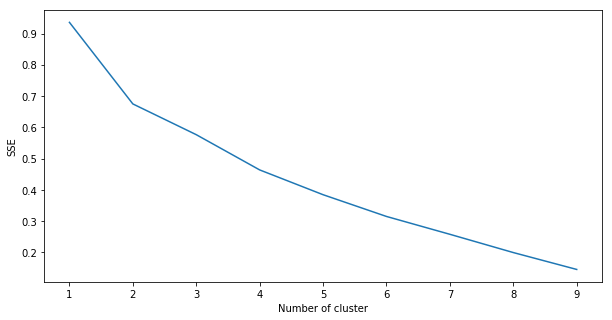

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = {}
kdata = zagreb_grouped_clustering
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(kdata)
    kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure(figsize = (10,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/8.elbow_point.png?raw=true" width = 600> </a>

From the image above we can see that our elbow point is best for k = 5

#### k - Means model:

In [24]:
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init = 12).fit(zagreb_grouped_clustering)
kmeans.labels_[0:10] 

array([1, 2, 2, 2, 3, 1, 2, 2, 4, 2], dtype=int32)

In [25]:
district_venues_sorted.insert(0, 'Clusters', kmeans.labels_)

zagreb_merged = df_zagreb
zagreb_merged = zagreb_merged.join(district_venues_sorted.set_index('District'), on='district_name')
zagreb_merged.head(7)

,district_name,lat,lng,size_km2,pop,pop_den,host,hot,priva,unem_men,unem_wom,unem_tot,house_prices,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brezovica,45.715581,15.920606,127,1203,95,0,0,8,111,130,241,973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Črnomerec,45.832531,15.938308,24,38546,1606,2,1,128,512,514,1026,1569,0.0,BBQ Joint,Bistro,Sake Bar,Bed & Breakfast,Food,Field,Fast Food Restaurant,Farmers Market,Electronics Store,Yoga Studio
2,Donja Dubrava,45.826214,16.051219,11,36363,3306,1,1,17,609,713,1322,1259,1.0,Café,Pizza Place,Bar,Supermarket,Light Rail Station,Gym / Fitness Center,Coffee Shop,Grocery Store,Pharmacy,Market
3,Donji Grad,45.808333,15.976111,3,37024,12341,15,14,752,517,547,1064,1901,2.0,Café,Plaza,Bar,Restaurant,Dessert Shop,Hotel,Hostel,Theater,Italian Restaurant,Mediterranean Restaurant
4,Gornja Dubrava,45.841125,16.055661,40,61841,1546,2,0,29,904,1022,1926,1250,2.0,Grocery Store,Pharmacy,Bar,Supermarket,Coffee Shop,Clothing Store,Bakery,Women's Store,Café,Shopping Mall
5,Gornji Grad–Medveščak,45.828247,15.979356,10,30962,3096,11,6,411,324,427,751,2062,2.0,Dessert Shop,Café,Bar,Supermarket,Pizza Place,Nightclub,Lounge,Pub,Chinese Restaurant,Multiplex
6,Maksimir,45.832156,16.019858,14,48902,3493,3,3,147,604,701,1305,1740,3.0,Café,Lake,Supermarket,Grocery Store,Soccer Field,Restaurant,Bus Station,Farmers Market,Electronics Store,Eastern European Restaurant


In [26]:
zagreb_merged.dropna(axis=0,inplace = True)
zagreb_merged['Clusters'] = zagreb_merged['Clusters'].astype('int')
zagreb_merged.head(2)

,district_name,lat,lng,size_km2,pop,pop_den,host,hot,priva,unem_men,unem_wom,unem_tot,house_prices,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Črnomerec,45.832531,15.938308,24,38546,1606,2,1,128,512,514,1026,1569,0,BBQ Joint,Bistro,Sake Bar,Bed & Breakfast,Food,Field,Fast Food Restaurant,Farmers Market,Electronics Store,Yoga Studio
2,Donja Dubrava,45.826214,16.051219,11,36363,3306,1,1,17,609,713,1322,1259,1,Café,Pizza Place,Bar,Supermarket,Light Rail Station,Gym / Fitness Center,Coffee Shop,Grocery Store,Pharmacy,Market


#### List of districts and clusters they belong to:

In [27]:
clustz = zagreb_merged[["Clusters", "district_name"]].sort_values(by = "Clusters")

In [28]:
clustz

,Clusters,district_name
1,0,Črnomerec
2,1,Donja Dubrava
7,1,Novi Zagreb – istok
12,1,Sesvete
14,1,Trešnjevka – jug
16,1,Trnje
3,2,Donji Grad
4,2,Gornja Dubrava
5,2,Gornji Grad–Medveščak
8,2,Novi Zagreb – zapad


#### Visualization of clusters

In [29]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11,tiles='Stamen Terrain')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zagreb_merged['lat'], zagreb_merged['lng'], zagreb_merged['district_name'],zagreb_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/9.Clusters.png?raw=true" width = 1000> </a>

#### Venues for "Donji grad"

In [30]:
donji_venues = zagreb_venues[zagreb_venues['District'].str.contains("Donji Grad")]
donji_venues.head(5)

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
40,Donji Grad,45.808333,15.976111,Korica,45.807549,15.974863,Bakery
41,Donji Grad,45.808333,15.976111,Trg Nikole Šubića Zrinskog | Zrinjevac,45.810244,15.978109,Plaza
42,Donji Grad,45.808333,15.976111,Trg kralja Tomislava,45.806442,15.978627,Plaza
43,Donji Grad,45.808333,15.976111,Le Bistro Esplanade,45.805591,15.975594,Restaurant
44,Donji Grad,45.808333,15.976111,Buzz Bar Zagreb,45.808939,15.974639,Bar


#### Lets look at the venues of our interest:

#### Plazas, which are great for foot traffic and large number of tourists:

In [31]:
donji_plaza = donji_venues[donji_venues['Venue Category'].str.contains("Plaza")]
donji_plaza

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
41,Donji Grad,45.808333,15.976111,Trg Nikole Šubića Zrinskog | Zrinjevac,45.810244,15.978109,Plaza
42,Donji Grad,45.808333,15.976111,Trg kralja Tomislava,45.806442,15.978627,Plaza
58,Donji Grad,45.808333,15.976111,Strossmayerov trg,45.808578,15.978560,Plaza
60,Donji Grad,45.808333,15.976111,Cvjetni trg,45.812251,15.974208,Plaza
70,Donji Grad,45.808333,15.976111,Trg bana Josipa Jelačića,45.813019,15.977229,Plaza
102,Donji Grad,45.808333,15.976111,Trg Europe,45.813235,15.979996,Plaza
115,Donji Grad,45.808333,15.976111,Strossmartre,45.814536,15.972880,Pedestrian Plaza
123,Donji Grad,45.808333,15.976111,Trg Republike Hrvatske,45.809648,15.969468,Plaza
137,Donji Grad,45.808333,15.976111,Rooseveltov trg,45.808075,15.968083,Plaza


#### Theaters:

In [32]:
donji_theat = donji_venues[donji_venues['Venue Category'].str.contains("Theater")]
donji_theat

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
53,Donji Grad,45.808333,15.976111,Zagrebačko kazalište mladih (ZKM),45.811199,15.976042,Theater
59,Donji Grad,45.808333,15.976111,Hrvatsko narodno kazalište u Zagrebu (HNK),45.809444,15.969960,Theater
77,Donji Grad,45.808333,15.976111,Zagrebačko kazalište lutaka (ZKL),45.807140,15.977001,Theater
84,Donji Grad,45.808333,15.976111,Kino Europa,45.811830,15.973250,Indie Movie Theater
112,Donji Grad,45.808333,15.976111,Kazalište Kerempuh,45.812323,15.970908,Theater


#### Museums:

In [33]:
donji_museum = donji_venues[donji_venues['Venue Category'].str.contains("Museum")]
donji_museum

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
107,Donji Grad,45.808333,15.976111,Muzej za umjetnost i obrt (MUO),45.809333,15.968855,Art Museum
128,Donji Grad,45.808333,15.976111,Galerija Klovićevi dvori,45.815022,15.974649,Museum


#### Historic sites:

In [34]:
donji_hist = donji_venues[donji_venues['Venue Category'].str.contains("Historic Site")]
donji_hist

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
86,Donji Grad,45.808333,15.976111,Ban Jelacic square,45.81308,15.977171,Historic Site


#### Lets look into competition:

#### Women's stores:

In [35]:
donji_ladies = donji_venues[donji_venues['Venue Category'].str.contains("Women's Store")]
donji_ladies

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [36]:
donji_cloth = donji_venues[donji_venues['Venue Category'].str.contains("Clothing Store")]
donji_cloth

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


As we can see this district has no womens stores, nor clothing stores. And with large number of plazas, art galleries and theaters it can be great for fashion clothing store.

### Lets visualize Aristic and cultural venues in Donji grad.

In [37]:
donji_museum['color'] = 'green'
donji_theat['color'] = 'blue'
donji_plaza['color'] = 'red'
donji_hist['color'] = 'yellow'
donji_data = pd.concat([donji_museum,donji_theat,donji_plaza,donji_hist])
donji_data.head(5)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,color
107,Donji Grad,45.808333,15.976111,Muzej za umjetnost i obrt (MUO),45.809333,15.968855,Art Museum,green
128,Donji Grad,45.808333,15.976111,Galerija Klovićevi dvori,45.815022,15.974649,Museum,green
53,Donji Grad,45.808333,15.976111,Zagrebačko kazalište mladih (ZKM),45.811199,15.976042,Theater,blue
59,Donji Grad,45.808333,15.976111,Hrvatsko narodno kazalište u Zagrebu (HNK),45.809444,15.969960,Theater,blue
77,Donji Grad,45.808333,15.976111,Zagrebačko kazalište lutaka (ZKL),45.807140,15.977001,Theater,blue


In [38]:
latitude = 45.808333
longitude = 15.976111

In [39]:
donji_map = folium.Map(location=[latitude, longitude], zoom_start=15,tiles='Stamen Terrain')#tiles='CartoDB dark_matter')

In [40]:
donji_venues = folium.map.FeatureGroup()
lat = donji_data['Venue Latitude'].values
long = donji_data['Venue Longitude'].values
label = donji_data['Venue']
category = donji_data['Venue Category']
col = donji_data['color'].values

for lat, lng, nam, cat, col in zip(lat, long, label, category, col):
    
    label = folium.Popup(str(cat) + '|:' + str(nam), parse_html=True)
    donji_venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color = col,#'green',#colors(row['District'],
            fill=True,
            fill_color= 'green',#[col - 1],#,'blue',
            fill_opacity=0.6
        )
    )
donji_map.add_child(donji_venues)

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/16.Cultural_sites.png?raw=true" width = 1000> </a>

#### Number of hostels, hotel and private accomodation in the district:

In [41]:
df_tor = df_zagreb[['district_name','host','hot','priva']] 
df_tor.sort_values(by = 'priva', ascending = False, inplace = True)
df_tor.head(5)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,district_name,host,hot,priva
3,Donji Grad,15,14,752
5,Gornji Grad–Medveščak,11,6,411
16,Trnje,9,12,185
15,Trešnjevka – sjever,4,4,161
6,Maksimir,3,3,147


Again we see the same districts come up, and "Donji Grad" has largest number of hostels, motels and units of private accomodation.

### Property prices:

In [42]:
df_price = df_zagreb[['district_name','house_prices']].sort_values(by = 'house_prices', ascending = False)
df_price.head(17)

,district_name,house_prices
5,Gornji Grad–Medveščak,2062
3,Donji Grad,1901
6,Maksimir,1740
10,Podsljeme,1654
1,Črnomerec,1569
16,Trnje,1528
14,Trešnjevka – jug,1523
15,Trešnjevka – sjever,1517
8,Novi Zagreb – zapad,1382
9,Peščenica – Žitnjak,1362


Lets visualize properity prices for each district in euros per square meter:

Text(0.5, 0, 'Property prices euros/m2')

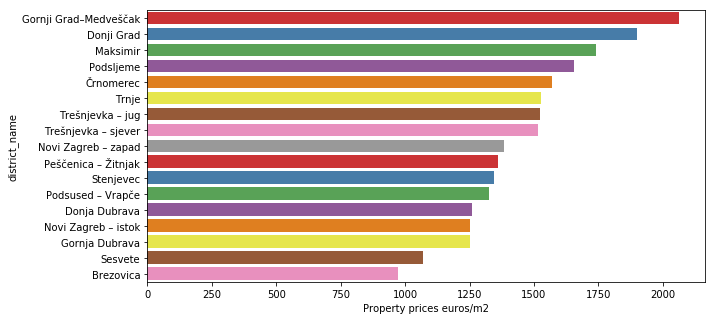

In [43]:
df = df_zagreb.sort_values(by = 'house_prices', ascending = False)
fig = plt.figure(figsize=(10,5))
chart_un = sns.barplot(y = "district_name",x = "house_prices", data = df, palette='Set1')
chart_un.set_xlabel("Property prices euros/m2")
#chart.set_xticklabels(rotation=45)

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/prices per meter.png?raw=true" width = 1000> </a>

Aslo lets see correlation between district size and property prices.


/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 2141.681393665892)

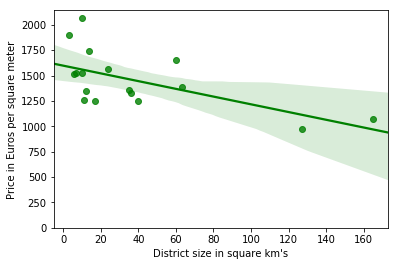

In [44]:
crt = sns.regplot(x="size_km2",y = 'house_prices', data = df_zagreb, color = 'green')
plt.xlabel("District size in square km's")
plt.ylabel("Price in Euros per square meter")
plt.ylim(0,)

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/17.Size-price.png?raw=true" width = 450> </a>

(0, 2292.2997198416383)

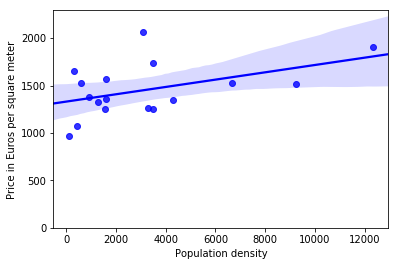

In [45]:
sns.regplot(x="pop_den",y = 'house_prices', data = df_zagreb, color = 'blue')
plt.xlabel("Population density")
plt.ylabel("Price in Euros per square meter")
plt.ylim(0,)

<img src = "https://github.com/juricajelic/Coursera_Capstone/blob/master/19.Density_price.png?raw=true" width = 450> </a>